<a href="https://colab.research.google.com/github/BlackCurrantDS/ATiML-Project/blob/master/4_Vader_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
#Importing the file
import pandas as pd
books = pd.read_csv("books.csv", index_col=0)
books.reset_index(inplace = True)
books.head(5)

,index,data,Book_Name,genre,Author_Name
0,9,Blacksheep! Blacksheep!\nMrs. Howard Featherst...,Blacksheep! Blacksheep!,Sea and Adventure,Nicholson| Meredith
1,17,"DEDICATED TO My Brother, ALLAN MELVILLE.\nNot ...",Mardi: and A Voyage Thither I,Sea and Adventure,Melville| Herman
2,19,Shortly.\n... The first shot was just a rib to...,The Recipe for Diamonds,Sea and Adventure,Hyne| Charles John Cutcliffe Wright
3,45,The night was as dark as the inside of a cow! ...,Dick Leslie's Luck: A Story of Shipwreck and A...,Sea and Adventure,Lillibridge| Will
4,60,This book is inscribed to those commanders und...,Command,Sea and Adventure,McFee| William


In [0]:
del books['index']

In [0]:
pip install vaderSentiment

In [0]:
import nltk
nltk.download('stopwords')
import nltk
nltk.download('punkt')
import nltk
nltk.download('averaged_perceptron_tagger')
import nltk
nltk.download('wordnet')
import nltk
nltk.download('maxent_ne_chunker')
import nltk
nltk.download('words')

In [0]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from nltk import sent_tokenize

def positive(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['pos'] / number_of_sen
    return c_pos

def negative(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['neg'] / number_of_sen
    return c_pos
    
def neutral(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['neu'] / number_of_sen
    return c_pos
    
def compound(text):
  analyzer = SentimentIntensityAnalyzer()
  sentences = sent_tokenize(text)
  c_pos = 0
  number_of_sen = len(sentences)
  for i in sentences:
    vs = analyzer.polarity_scores(i)
    c_pos += vs['compound'] / number_of_sen
    return c_pos


In [0]:
def sentiment_analysis(books):
    df = books.copy() 
    
    df['positive'] = df.data.apply(positive)
    df['negative'] = df.data.apply(negative)
    df['neutral'] = df.data.apply(neutral)
    df['compund'] = df.data.apply(compound)
    return df


In [0]:
df_senti = sentiment_analysis(books)

In [0]:
df_senti.head(10)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


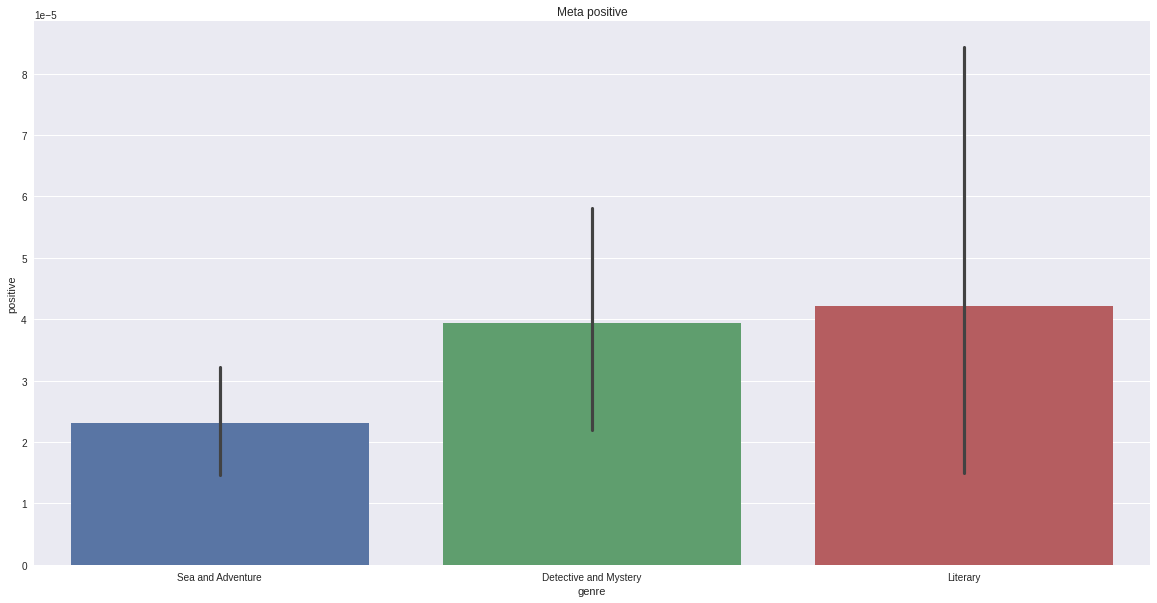

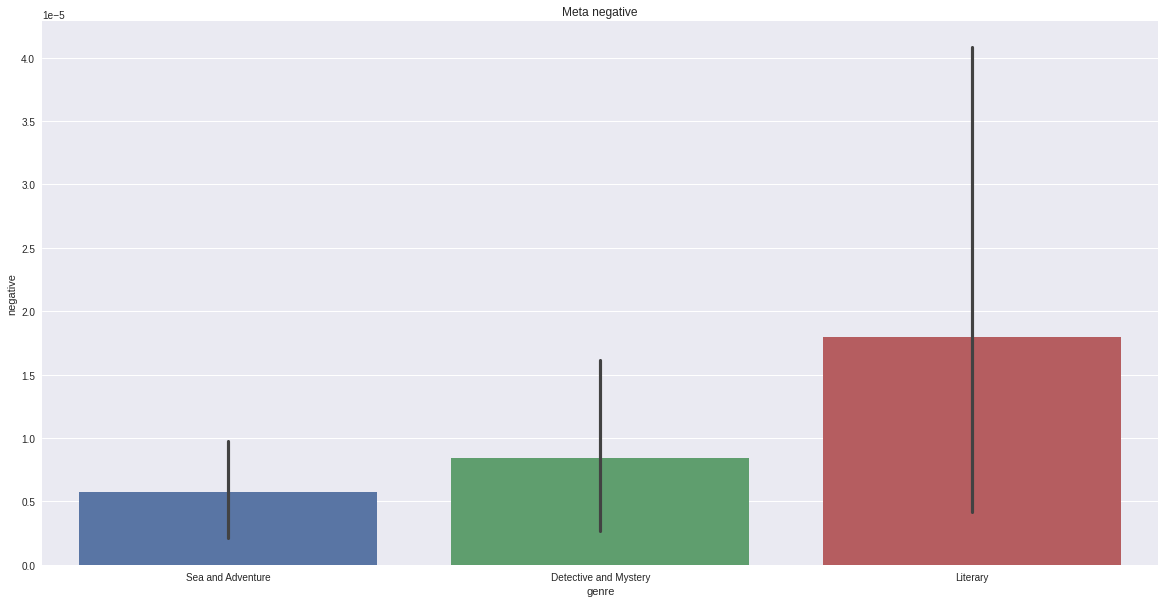

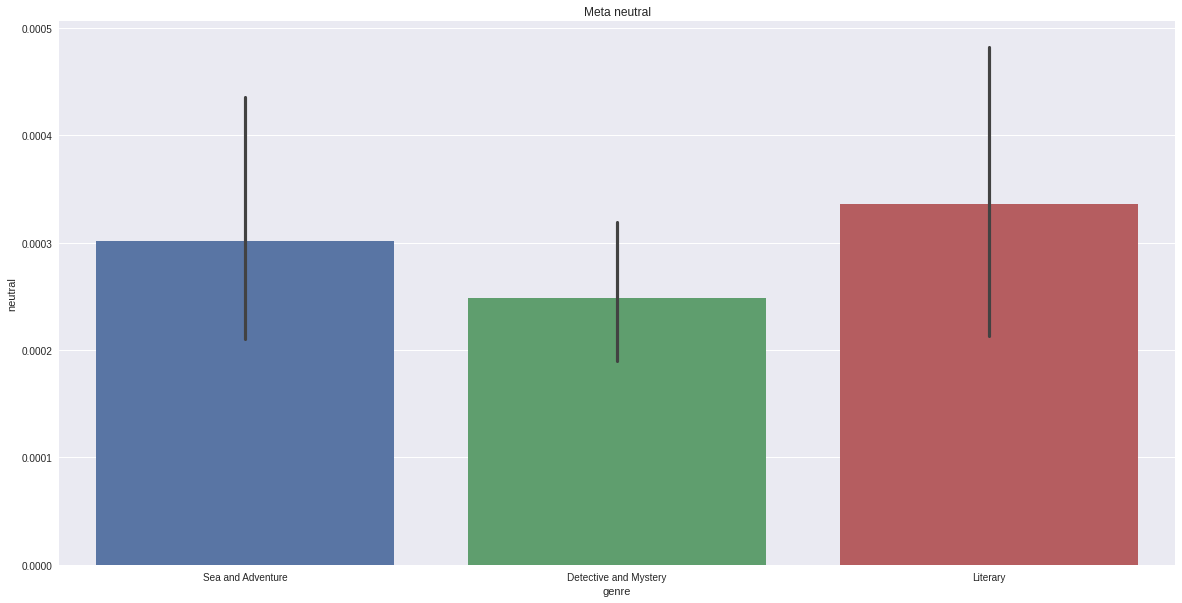

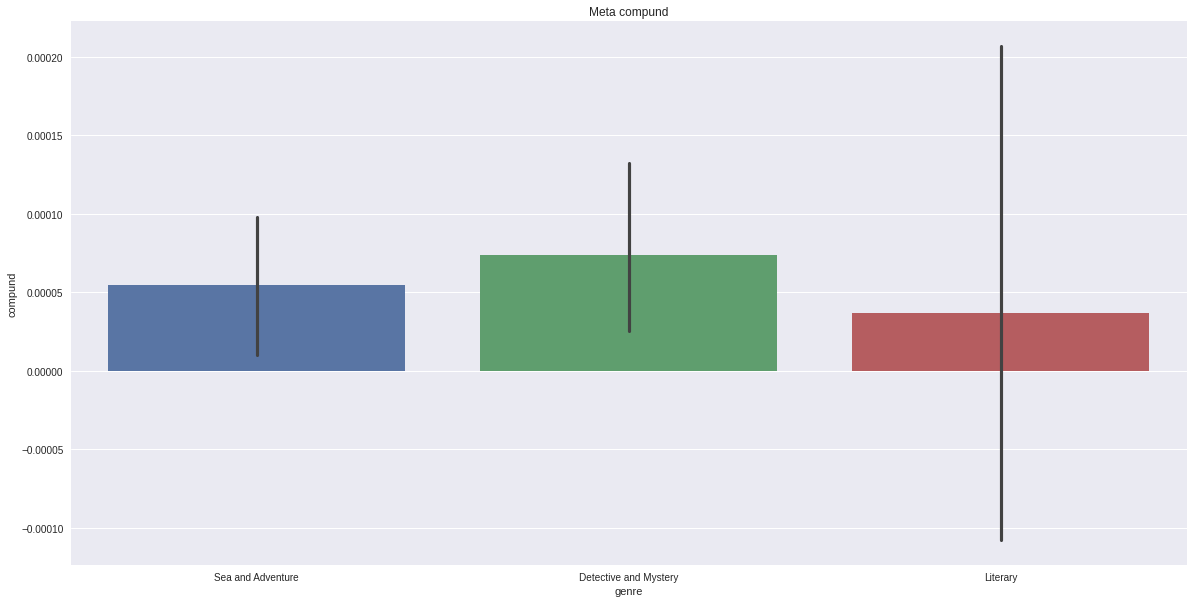

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
for c in df_senti.columns[4:]:
    plt.figure(figsize=(20,10))
    plt.style.use('seaborn')
    sns.barplot(x='genre', y=c, data=df_senti)
    plt.title('Meta {}'.format(c))
    plt.savefig('Meta {}'.format(c))
    plt.show()